#### Statistical Tests Divided into two main categories:
* Parametric
* Non-parametric
#### Parametric Tests:
* Independence of observations: the individual observations (each entry of the variables) are independent of each other (for instance, repeating the same test on a single patient generates non-independent measurements, that is, repeated measurements).
* Normality of data: the data follows a normal distribution. This assumption is required only for quantitative data. (For more details, see also here)
* Homogeneity of variance: the variance (i.e., the distribution, or “spread,” of scores around the mean) within each group being compared is similar among all groups. If one group has much more variance than the others, this will reduce the “power” of the test in identifying differences.

## Note : If your data, instead, do not satisfy the assumptions of normality or homogeneity of variance, you may be able to perform a non-parametric statistical test, which allows you to make comparisons without these two assumptions.

#### Tests for Normality:


mean=50.303 stdv=4.426


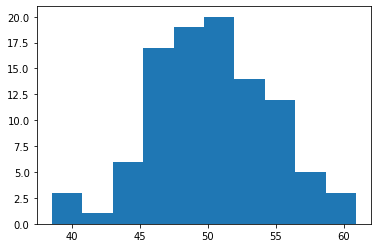

In [2]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy import mean
from numpy import std
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

# histogram plot
pyplot.hist(data)
pyplot.show()

In [3]:
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


#### Example T-test
*  bottle filling machine is set to fill bottles with soft drink to a volume of 500 ml. The
actual volume is known to follow a normal distribution. The manufacturer believes the
machine is under-filling bottles. A sample of 20 bottles is taken and the volume of liquid
inside is measured.
The volumes were: 484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88,501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
* Calculate the sample mean and standard deviation.
* Use a one-sample t-test to determine whether the bottles are being consistently under filled using a significance level of 0.05.

In [11]:
import numpy as np
from scipy import stats
sample = np.array([484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 
                   473.88,501.59, 502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 
                   518.13, 464.32, 449.08, 489.27])
mu = np.mean(sample)
mu

491.5705

In [12]:
t_value,p_value=stats.ttest_1samp(sample,mu)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that there is no significant mean difference in systolic blood pressure. 

i.e., μ = 491 at %.2f level of significance'''%alpha)

else:
  print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,
           'We do not reject the null hypothesis H0.')

Test statistic is 0.000000
p-value for one tailed test is 0.500000
Conclusion n Since p-value(=0.500000) > alpha(=0.05) We do not reject the null hypothesis H0.


#### Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy, an experiment was conducted. The results are given below:
* Ammonium chloride (X1) :13.4	10.9	11.2	11.8	14	15.3	14.2	12.6	17	16.2	16.5	15.7
* Urea (X2) :	12	11.7	10.7	11.2	14.8	14.4	13.9	13.7	16.9	16	15.6	16

In [13]:
Ammonium_chloride=[13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7]
Urea=[12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16]

In [14]:
from scipy import stats

t_value,p_value=stats.ttest_ind(Ammonium_chloride,Urea)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

effect of ammonium chloride and urea on grain yield of paddy are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 0.184650
p-value for two tailed test is 0.855195
Conclusion n Since p-value(=0.855195) > alpha(=0.05) We do not reject the null hypothesis H0.


#### ANOVA Test

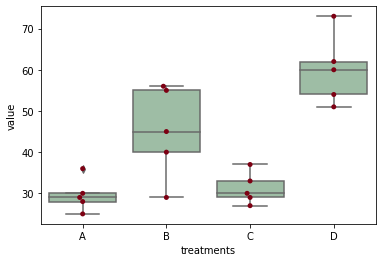

In [15]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [16]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [18]:
! pip install bioinfokit

     |████████████████████████████████| 84 kB 2.6 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=07aabcd9e8678c9fa008955a95b70f80fc18350f2f7f9dc9a550311fa850bdb7
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=337e445cc1970a243ee0ef69e180afce9e156cd934449188077435f76a94dc2e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [19]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN
